In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(293423)

<font size="8" >Анализ АБ-тестов: теория на примере конверсии</font>

# Кто я?

<img src="whoami2.png" width="1500" align="center">

# О чем поговорим?

1. Что такое АБ тест?
    - Основные понятия
    - Что такое АБ тест?
    - Выбор метрик
1. Теория
    - Математическая постановка задачи
    - Конверсия и ее распределение
    - Ошибки первого и второго рода
    - Уровень значимости и мощность
    - p-value и проверка гипотез на примере Z-критерия
    - Необходимый размер выборки
1. Полезные инструменты
1. Резюме

# Что такое АБ тесты

## Основные понятия

* **Генеральная совокупность** - совокупность всех объектов, относительно которых предполагается делать выводы при изучении конкретной задачи
* **Выборочная совокупность (Выборка)** - представительная часть генеральной совокупности (набор наблюдений)
* **Наблюдение** - элемент выбороки. Например: клиент совершающий покупку билета на автобус

## Что такое АБ тесты

**АБ-тест** - это инструмент для проверки бизнес гипотез, проведения маркетинговых исследований. Тестируются две или более групп, на которые производится разное воздействие. Цель тестирования - выявить наиболее эффективное из них.

АБ тесты бывают:
* Оффлайн
* <font size="3" color="green">Онлайн</font> 
$\checkmark$

<font size="8" >Какой вариант лучше</font>

<img src="test_var.png" width="600" height="255" align="left"> <img src="cntrl_var.png" width="600" height="255" align="right">

<img src="abtest1.png" width="1500" align="center">

## Выбор метрик

1. Выбрать одну метрику или приоритизировать
2. Метрика зависит только от пользователей, на которых тестируют гипотезу
3. Анализ зависит от типа метрик

<img src="ratio.png">

<img src="user.png">

В этой лекции мы будем говорить про поюзерные метрики, потому что они выборки для поюзерных метрик состоят из независимых одинаково распредеденных случайных величин (одно наблюдение - один пользователь, пользователи независимы между собой), что как раз необходимо для критерия , который мы будем применять

# Теория

## Математическая постановка задачи

Будем проверять, что математические ожидания распределений наших метрик совпадают:

* $H_0 : E(X_c) = E(X_t) - \ \ нулевая \ \  гипотеза$
* $H_1 : E(X_c) \neq E(X_t) - \ \ альтернативная \ \  гипотеза$ 

## Конверсия, распределение конверсии

### Что такое конверсия?
Конверсия, это такая поюзерная метрика, которая определяет долю юзеров, совершивших целевое действие.


**Например:**
* Сделали покупку авиа билета
* Кликнули в кнопку подписки на новости
* Зарегистрировались на сайте

Рассмотрим на примере покупки авиабилета.

$$X = (0,1,0,0,1,0,1, \ldots, 1,0,1,0,0,0,1)$$


С математической точки зрения такая выборка $-$ это n независимых генераций случайной величины, которая распределена по закону Бернулли с вероятностью успеха $p$. 

Напомним, что для случайной величины $Y \sim Ber(p)$: $\mathbb{E}= p, \mathbb{D} = p(1-p)$


Для математического ожидания хорошей оценкой является выборочное среднее. Обозначим выборочное среднее для нашего примера за $\hat{p}$
$$ \overline{X}  = \frac{\sum(X_i)}{n} = \hat{p} $$

Тогда для группы контроля выборочное среднее будет $\hat{p}_{c}$, а для группы теста $\hat{p}_{t}$

### ЦПТ и распределение выборочного среднего

ЦПТ нам дает очень важное свойство выборочного среднего:

Пусть у нас есть выборка из n независимых, одинаково распределенных случайных величин с математическим ожиданием $\mu$ и дисперссией $\sigma^2$:

$$X = (X_1, \ldots, X_n)$$ 


$$\overline{X}_{n} \rightarrow N(\mu, \frac{\sigma^2}{n}) \ \ при \ \  n \rightarrow \infty$$

Так как мы имеем выборку распределенную по закону Бернули с вероятностью успеха $p$, то: 

$$\overline{X}_{n} \rightarrow N(p, \frac{p(p-1)}{n}) \ \ при \ \  n \rightarrow \infty$$

Text(0.5, 1.0, 'CDF')

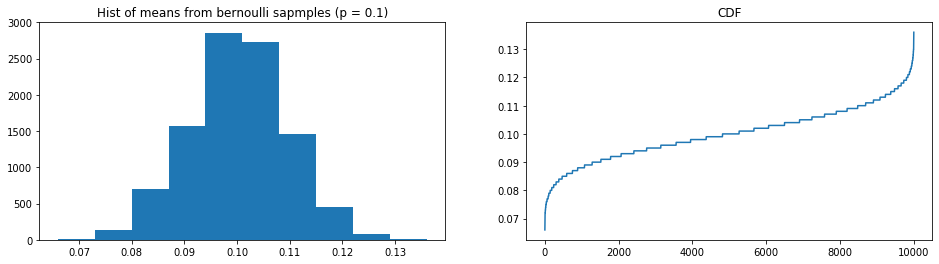

In [2]:
p = 0.1
rv_bernoulli = stats.bernoulli(p = p)
sample_means = []
n=1000
m = 10000
for i in range(m):
    sample_means.append((np.sum(rv_bernoulli.rvs(n)/n)))

fig, ax = plt.subplots(figsize = (16,4), nrows= 1, ncols= 2)
ax[0].hist(sample_means)
ax[0].set_title(f'Hist of means from bernoulli sapmples (p = {p})')
pdf_1 = sorted(sample_means)
ax[1].plot(pdf_1)
ax[1].set_title('CDF')

## Ошибки первого и второго рода

<img src="errors.png">

## Уровень значимости, мощность

### Уровень значимости

Давайте вспомним, какие гипотезу мы рассматриваем

$$H_{0} : \mathbb{E}X_{c} = \mathbb{E}X_{t}$$
$$H_{1} : \mathbb{E}X_{c} \neq \mathbb{E}X_{t}$$

Переписать это можно как $$H_{0} : \mathbb{E}X_{c}- \mathbb{E}X_{t} = 0 $$

Тогда вместо того что бы сравнивать распределения выборочных средних группы контроля и группы теста, мы будем рассматривать их разность и проверять, что мат ожидание генеральной совокупности равно 0

Заметим, что разность нормальных распределений остается нормальным распределением. Поэтому разность выборочных средних будет распределена нормально

Нормальное распределение хорошо тем, что теоретически может генерировать значения от минус бесконечности до плюс бесконечности но с большой вероятностью значения буду лежать недалеко от "среднего". В нашем случае это среднее - 0.

Чтобы иметь возможность отвергнуть нулевую гипотезу нужно "отдать" часть возможных, но маловероятных значений альтернативной гипотезе. Обычно делают так: если полученное значение лежит "достаточно далеко" от среднего - мы отвергаем нулевую гипотезу

Это "достаточно далеко" мы можем определять сами. Давайте построим кривую нормального распределения со средним 0 и посмотрим о чем речь

In [3]:
var = 0.01
rv_norm_0 = stats.norm(0, (var)**(1/2))

In [4]:
left = stats.norm.interval(0.95, loc=0, scale=(var)**(1/2))[0]
right = stats.norm.interval(0.95, loc=0, scale=(var)**(1/2))[1]

No handles with labels found to put in legend.


Закрашенная площадь : 0.05


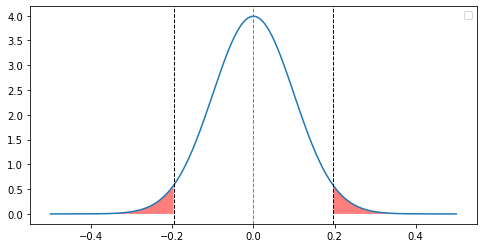

In [5]:
fig, ax = plt.subplots(figsize = (8,4))
x = np.linspace(-0.5, 0.5, 1000)
pdf = rv_norm_0.pdf(x)
ax.plot(x, pdf)

ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x > right))
ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x < left))
ax.axvline(right, color = 'black', ls = '--', lw = 1)
ax.axvline(left, color = 'black', ls = '--', lw = 1)
ax.axvline(0, color = 'gray', ls = '--', lw = 1)
ax.legend()

print(f'Закрашенная площадь : {round(1-rv_norm_0.cdf(right)+rv_norm_0.cdf(left),2)}')

Мы говорим, что вероятность попасть в закрашенную область очень мала, и поэтому значение, которое попало в эту область для нас не принадлежит этому распределеню. 

Такая вероятность называется - **уровень значимости** или **вероятность ошибки первого рода** и обычно обозначается буквой $\alpha$


Самые распространенные $\alpha$:
* $\alpha= 0.05 \ \ (5\%)$
* $\alpha= 0.01 \ \  (1\%)$
* $\alpha= 0.1 \ \ (10 \%)$

###  Мощность

**Ошибка второго рода** - это когда мы не отвергаем нулевую гипотезу, когда верна альтернативная

Вероятность совершить ошибку первого рода мы уже определили как уровень значимости ($\alpha$). Но ошибку второго рода игнорировать нельзя. Но мы редко пользуемся таким понятием как вероятность ошибки второго рода, чаще всего мы использаем понятие **мощность**.

Мощность обозначается чаще всего буквой $P$ и равна она 1 минус вероятность ошибки второго рода:
$$P = 1 - \alpha_{II}$$


То есть это вероятность отвергнуть нулевую гипотезу, когда верна альтернативная.


In [6]:
rv_norm_delta = stats.norm(0.1, (var)**(1/2))

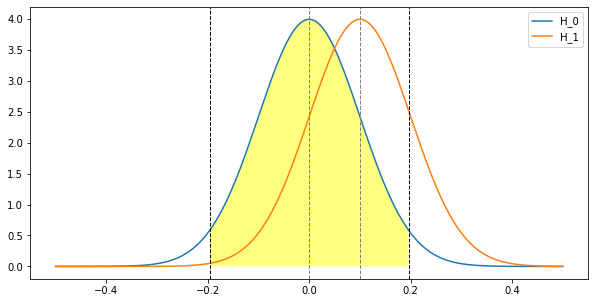

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.5, 0.5, 1000)
pdf = rv_norm_0.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'H_0')
ax.plot(x, pdf_delta, label = 'H_1')
ax.fill_between(x, 0, pdf, facecolor='yellow', alpha=0.5,  where=((x < right) & (x> left)))
ax.axvline(right, color = 'black', ls = '--', lw = 1)
ax.axvline(left, color = 'black', ls = '--', lw = 1)
ax.axvline(0, color = 'gray', ls = '--', lw = 1)
ax.axvline(0.1, color = 'gray', ls = '--', lw = 1)
ax.legend()

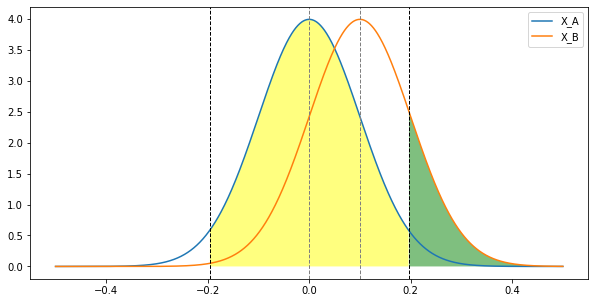

In [8]:
fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.5, 0.5, 1000)
pdf = rv_norm_0.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'X_A')
ax.plot(x, pdf_delta, label = 'X_B')
ax.fill_between(x, 0, pdf, facecolor='yellow', alpha=0.5,  where=((x < right) & (x> left)))
ax.fill_between(x, 0, pdf_delta, facecolor='green', alpha=0.5,  where=(x > right) )
ax.axvline(right, color = 'black', ls = '--', lw = 1)
ax.axvline(left, color = 'black', ls = '--', lw = 1)
ax.axvline(0, color = 'gray', ls = '--', lw = 1)
ax.axvline(0.1, color = 'gray', ls = '--', lw = 1)
ax.legend()

Посчитаем площадь части, которая закрашена зеленым

In [9]:
P = 1-rv_norm_delta.cdf(right)
print(f'Мощность при дисперссии = {var}: {P}')

Мощность при дисперссии = 0.01: 0.1685366707102025


Закрашенная область представляет собой вероятность принять альтернативную гипотезу при условии, что она верна или **мощность теста**.

* Мы заранее можем сказать, какую мощность теста мы ждем. 
* Мощность сильно зависит от дисперсии выборок.

Мощность при дисперссии = 0.001: 0.8853789898000417


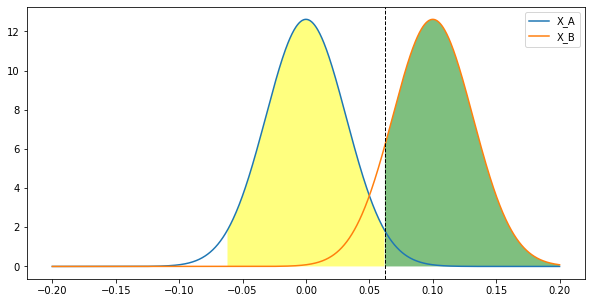

In [10]:
var = 0.001
rv_norm_0 = stats.norm(0, (var)**(1/2))
left = stats.norm.interval(0.95, loc=0, scale=(var)**(1/2))[0]
right = stats.norm.interval(0.95, loc=0, scale=(var)**(1/2))[1]
rv_norm_delta = stats.norm(0.1, (var)**(1/2))
fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.2, 0.2, 1000)
pdf = rv_norm_0.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'X_A')
ax.plot(x, pdf_delta, label = 'X_B')
ax.fill_between(x, 0, pdf, facecolor='yellow', alpha=0.5,  where=((x < right) & (x> left)))
ax.fill_between(x, 0, pdf_delta, facecolor='green', alpha=0.5,  where=(x > right) )
ax.axvline(right, color = 'black', ls = '--', lw = 1)
ax.legend()

P = 1-rv_norm_delta.cdf(right)
print(f'Мощность при дисперссии = {var}: {P}')

По умолчанию мощность выбирают 80%: в 1 из 5 случаев мы не найдем разницы, если она, на самом деле, существует. Нам этого достаточно 

## p-value и проверка гипотез на примере Z - критерия разностей долей 

### Z-критерий

${\displaystyle X_{A}^{n_1} \sim  Ber(p_c) } $, ${\displaystyle X_{B}^{n_2} \sim  Ber(p_t) }$ - две независимые выборки размера $n_c$ и $n_t$


* Нулевая гипотеза ${\displaystyle H_0: p_c = p_t}$
* Альтернативная гипотеза ${\displaystyle H_0: p_c \neq p_t}$

$\displaystyle \hat{p}_c = \overline{X}_{c} , \hat{p}_t = \overline{X}_{t} $


$ {\displaystyle Z-статистика : Z(X_{c}^{n_c}, X_{t}^{n_t}) = \frac{\hat{p}_c - \hat{p}_c}{\sqrt{P(1-P)(\frac{1}{n_c}+ \frac{1}{n_t})}}}$, где $\displaystyle{P=\frac{\hat{p}_cn_c+\hat{p}_t n_t}{n_c+n_t}}$

При  $H_0$: $\displaystyle { Z(X_{c}^{n_c}, X_{t}^{n_t}) \sim N(0,1)}$

In [11]:
p_c = 0.1
p_t = 0.101
n_c = 1000
n_t = 1050
rv_bernoulli_c = stats.bernoulli(p = p_c)
rv_bernoulli_t = stats.bernoulli(p = p_t)
X_c = rv_bernoulli_c.rvs(n_c)
X_t = rv_bernoulli_t.rvs(n_t)
p_c_x = np.sum(X_c)/n_c
p_t_x = np.sum(X_t)/n_t

P = (p_c_x*n_c+p_t_x*n_t)/(n_c+n_t)

Z = (p_c_x-p_t_x)/(P*(1-P)*(1/n_c+1/n_t))**(1/2)
print(f'z_score : {np.round(Z, 3)}')

z_score : -0.175


### P-value

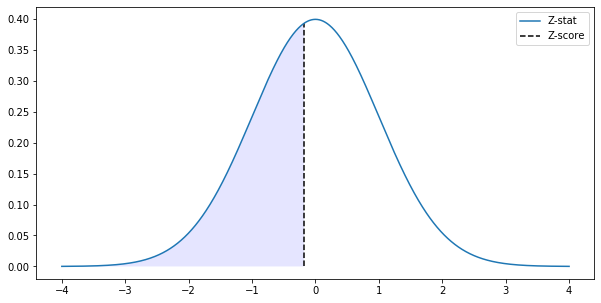

In [12]:
rv_norm_standart = stats.norm(0, 1)
fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-4, 4, 1000)
pdf = rv_norm_standart.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
ax.vlines(Z, 0, rv_norm_standart.pdf(Z), ls = '--', label = 'Z-score')
if Z>0:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.1,  where=(x > Z) )
else:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.1,  where=(x < Z) )
ax.legend()

$\displaystyle{ \textbf {p-value}}$ - вероятность получить значение такое же или еще более экстремальные, при условии равенства нулевой гипотезы.


<br>
<br>
<br>


Если  $p-value < \alpha$, то мы говорим, что изменения **статистически значимы** и отклоняем нулевую гипотезу

In [13]:
def check_significant(Z, alpha):
    if Z < 0:
        p_value = rv_norm_standart.cdf(Z)
    else:
        p_value = 1-rv_norm_standart.cdf(Z)
        
    print(f'p-value: {round(p_value, 2)}', f'alpha: {alpha}')
    if p_value < alpha:
        print('significant')
    else:
        print('not significant')

Что бы посчитать точку, значения больше которой дадут в сумме площадь под кривой равной уровню значимости, нам надо высчитать посчитать Zα/2 и Z 1-alpha/2 - альфа квантили нормального распредления, где альфа - уровень значимости = 0.05
Давайте нарисуем все площади и проверим значима ли разница

In [14]:
alpha = 0.05
z_left = rv_norm_standart.ppf(alpha/2)
z_right = rv_norm_standart.ppf(1-alpha/2)

print(f'|Z_alpha/2| = {round(abs(z_left),2)}')

|Z_alpha/2| = 1.96


p-value: 0.43 alpha: 0.05
not significant


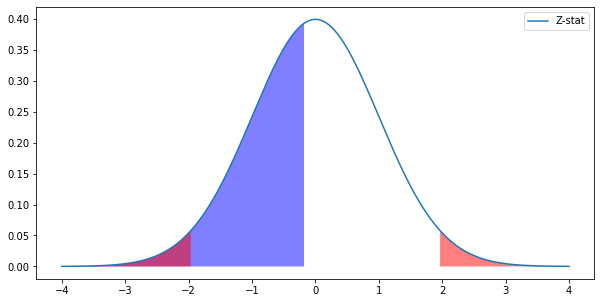

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-4, 4, 1000)
pdf = rv_norm_standart.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
if Z <0:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.5,  where=(x < Z) )
else:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.5,  where=(x > Z) )

ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x > z_right) )
ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x < z_left) )
ax.legend()

check_significant(Z, alpha)

Видим что площадь синяя площадь больше чем красная, значит не отклоняем нулевую гипотезу. Давайте посмотрим другой вариант, где мы отклоним нулевую гипотезу с большой вероятность.

In [16]:
p_c = 0.1
p_t = 0.126
n_c = 1000
n_t = 1050
rv_bernoulli_c = stats.bernoulli(p = p_c)
rv_bernoulli_t = stats.bernoulli(p = p_t)
X_c = rv_bernoulli_c.rvs(n_c)
X_t = rv_bernoulli_t.rvs(n_t)
p_c_x = np.sum(X_c)/n_c
p_t_x = np.sum(X_t)/n_t

P = (p_c_x*n_c+p_t_x*n_t)/(n_c+n_t)

Z = (p_t_x-p_c_x)/(P*(1-P)*(1/n_c+1/n_t))**(1/2)
print(f'p_c_x : {p_c_x}')
print(f'p_t_x : {p_t_x}')
print(f'z_score : {np.round(Z, 3)}')

p_c_x : 0.108
p_t_x : 0.11714285714285715
z_score : 0.654


p_c_x : 0.108
p_t_x : 0.11714285714285715
p-value: 0.26 alpha: 0.05
not significant


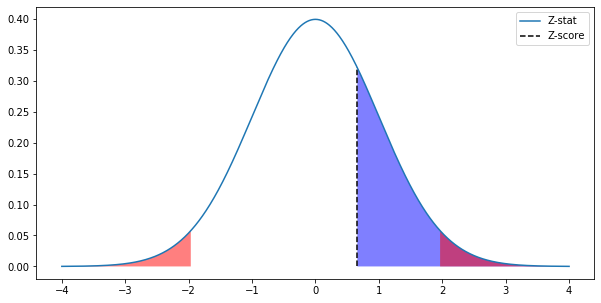

In [17]:
alpha = 0.05
z_left = rv_norm_standart.ppf(alpha/2)
z_right = rv_norm_standart.ppf(1-alpha/2)

fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-4, 4, 1000)
pdf = rv_norm_standart.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
ax.vlines(Z, 0, rv_norm_standart.pdf(Z), ls = '--', label = 'Z-score')
if Z <0:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.5,  where=(x < Z) )
else:
    ax.fill_between(x, 0, pdf, facecolor='blue', alpha=0.5,  where=(x > Z) )
ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x > z_right) )
ax.fill_between(x, 0, pdf, facecolor='red', alpha=0.5,  where=(x < z_left) )
ax.legend()

print(f'p_c_x : {p_c_x}')
print(f'p_t_x : {p_t_x}')

check_significant(Z, alpha)

Мощность при дисперссии = 0.014147: 9.0%


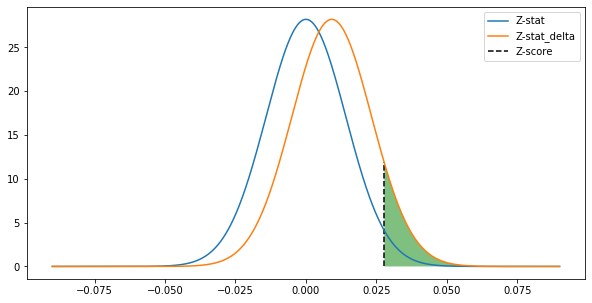

In [18]:
sigma  = round(pow(p_t*(1-p_t)/n_c+p_c*(1-p_c)/n_c,0.5),6)
rv_norm = stats.norm(0, sigma)
rv_norm_delta = stats.norm(p_t_x-p_c_x, sigma)

alpha = 0.05
left_alpha = rv_norm.ppf(alpha/2)
right_alpha = rv_norm.ppf(1-alpha/2)

fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.09, 0.09, 1000)
pdf = rv_norm.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
ax.plot(x, pdf_delta, label = 'Z-stat_delta')
ax.vlines(right_alpha, 0, rv_norm_delta.pdf(right_alpha), ls = '--', label = 'Z-score')

ax.fill_between(x, 0, pdf_delta, facecolor='green', alpha=0.5,  where=(x > right_alpha) )
ax.legend()


P = 1-rv_norm_delta.cdf(right_alpha)
print(f'Мощность при дисперссии = {sigma}: {round(P,2)*100}%')

Мощность мала.  в (1-P)% случаев мы не найдем разницы, если она, на самом деле, существует. Увеличим размер выборки, чтобы увеличить мощность 

In [19]:
p_c = 0.1
p_t = 0.126
n_c = 3000
n_t = 3100
rv_bernoulli_c = stats.bernoulli(p = p_c)
rv_bernoulli_t = stats.bernoulli(p = p_t)
X_c = rv_bernoulli_c.rvs(n_c)
X_t = rv_bernoulli_t.rvs(n_t)
p_c_x = np.sum(X_c)/n_c
p_t_x = np.sum(X_t)/n_t

P = (p_c_x*n_c+p_t_x*n_t)/(n_c+n_t)

Z = (p_c_x-p_t_x)/(P*(1-P)*(1/n_c+1/n_t))**(1/2)
print(f'p_c_x : {p_c_x}')
print(f'p_B_x : {p_t_x}')
print(f'z_score : {np.round(Z, 3)}')

p_c_x : 0.098
p_B_x : 0.1270967741935484
z_score : -3.592


Мощность при дисперссии = 0.008167: 95.0%


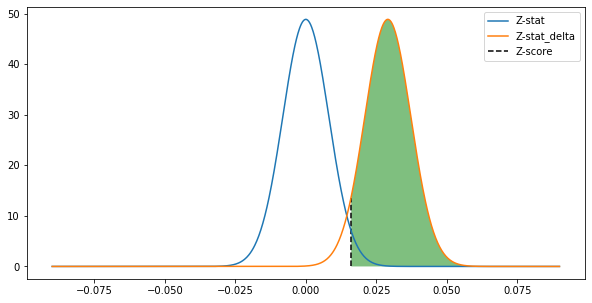

In [20]:
sigma  = round(pow(p_t*(1-p_t)/n_c+p_c*(1-p_c)/n_c,0.5),6)
rv_norm = stats.norm(0, sigma)
rv_norm_delta = stats.norm(p_t_x-p_c_x, sigma)

alpha = 0.05
left_alpha = rv_norm.ppf(alpha/2)
right_alpha = rv_norm.ppf(1-alpha/2)

fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.09, 0.09, 1000)
pdf = rv_norm.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
ax.plot(x, pdf_delta, label = 'Z-stat_delta')
ax.vlines(right_alpha, 0, rv_norm_delta.pdf(right_alpha), ls = '--', label = 'Z-score')

ax.fill_between(x, 0, pdf_delta, facecolor='green', alpha=0.5,  where=(x > right_alpha) )
ax.legend()


P = 1-rv_norm_delta.cdf(right_alpha)
print(f'Мощность при дисперссии = {sigma}: {round(P,2)*100}%')

## Необходимый размер выборки

При заданном уровне мощности, уровне значимости, конверсии сейчас, предполагемом абсолютном приросте конверсии, можем вычислить необходимый размер выборок:


$$\displaystyle{n = \frac{\overline{p}(1-\overline{p})(z_{\alpha/2} + z_{\beta})^{2}}{(m)^2}},$$
где 
* $\displaystyle{z_{\beta}}$ - квантиль нормального стандартного распреляния порядка равному мощности
* $\displaystyle{z_{\alpha/2}}$ - квантиль нормального стандартного распреляния порядка равному уровню значимости пополам
* $\displaystyle{m}$ - ожидаемы прирост
* $\displaystyle{\overline{p} = p_A+p_A+m}$ - объединенная конверсия группы теста и контроля

In [21]:
alpha = 0.05
beta = 0.8


rv_norm = stats.norm(0, 1)

z_alpha = rv_norm.ppf(1-alpha/2)
z_beta = rv_norm.ppf(1-0.2)
m = 0.02

pooled_prob = (p_c_x+p_c_x+0.2)/2

n =pooled_prob*(1-pooled_prob)*(z_alpha+z_beta)**2/(m)**2
print(f'Необходимый размер выборки: {round(n,0)}')

Необходимый размер выборки: 3116.0


### Проблема подглядывания

Сейчас я хочу вам показать, почему так важно заранее выбрать необходимый размер выборки

Ошибки которые вы можете совершить при проведении АБ теста:
* Выключить его слишком рано
* Выключить сликом поздно

<img src="pvalue.png" width = 1000 align = "top">

Подглядывать можно, и даже иногда полезно. Но выключать из-за подглядывания -большая ошибка

# Полезные инструменты для анализа АБ тестов в python

##  ab_calc

In [22]:
import ab_calc

<font size="8" >Документация</font>


<img src="abcalc1.png" align = 'left' width = '600'>
<img src="abcalc22.png" align = 'left' width = '600'>

In [23]:
p_c = 0.1
p_t = 0.126
n_c = 3000
n_t = 3100
rv_bernoulli_c = stats.bernoulli(p = p_c)
rv_bernoulli_t = stats.bernoulli(p = p_t)
X_c = rv_bernoulli_c.rvs(n_c)
X_t = rv_bernoulli_t.rvs(n_t)
p_c_x = np.sum(X_c)/n_c
p_t_x = np.sum(X_t)/n_t

P = (p_c_x*n_c+p_t_x*n_t)/(n_c+n_t)

Z = (p_c_x-p_t_x)/(P*(1-P)*(1/n_c+1/n_t))**(1/2)
print(f'z_score : {np.round(Z, 3)}')

z_score : -4.606


In [24]:
m_c = sum(X_c)
m_t = sum(X_t)
ab_calc.pretty_all(m_c, n_c, m_t, n_t)

Advantage: 41.16%
Z:  4.63
Power: 99%
Wait_Multiplier:  0.0


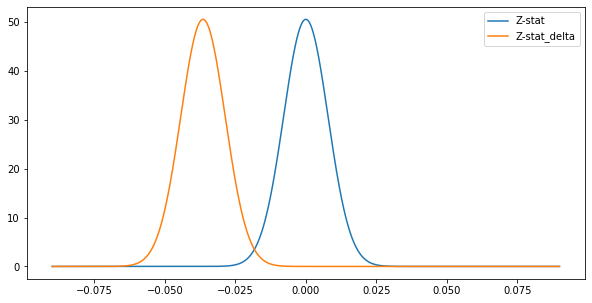

In [25]:
mu = m_c/n_c-m_t/n_t
sigma = ab_calc.sigma_pp(m_c, n_c, m_t, n_t)
rv_norm_delta = stats.norm(mu, sigma)
rv_norm = stats.norm(0, sigma)

fig, ax = plt.subplots(figsize = (10,5))
x = np.linspace(-0.09, 0.09, 1000)
pdf = rv_norm.pdf(x)
pdf_delta = rv_norm_delta.pdf(x)
ax.plot(x, pdf, label = 'Z-stat')
ax.plot(x, pdf_delta, label = 'Z-stat_delta')
ax.legend()

<font size="8" >Спасибо за внимание и до новых встреч</font>


<font size="8" >tlg: @emiliyam</font>